In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline



# Reading Datasets

In [2]:
fake = pd.read_csv("C:/Users/admin/Documents/Fake.csv")
true = pd.read_csv("C:/Users/admin/Documents/True.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_7368\1606339653.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv("C:/Users/admin/Documents/Fake.csv")


In [3]:
fake.shape

(23502, 172)

In [4]:
true.shape

(21417, 4)

# Data Cleaning and Preparation

In [5]:
# add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
# concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44919, 173)

In [7]:
# shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
# check the data
data.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,"Militants attack east Congo bases, killing two...","GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,8-Oct-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
1,Elizabeth Warren HILARIOUSLY Continues Battle...,If you haven t heard about the ongoing battle ...,News,23-May-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
2,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,31-Mar-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
3,SUPREME COURT JUSTICE Reveals How She Wanted T...,It s no secret that Justice Sotomayor is a lib...,Government News,19-Oct-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
4,Britain's Brexit firebrand Farage meets Trump ...,NEW YORK/LONDON (Reuters) - Leading Brexit cam...,politicsNews,12-Nov-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [9]:
# removing unnamed columns
df = pd.DataFrame(data)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.head()

,title,text,subject,date,target
0,"Militants attack east Congo bases, killing two...","GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,8-Oct-17,true
1,Elizabeth Warren HILARIOUSLY Continues Battle...,If you haven t heard about the ongoing battle ...,News,23-May-16,fake
2,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,31-Mar-15,fake
3,SUPREME COURT JUSTICE Reveals How She Wanted T...,It s no secret that Justice Sotomayor is a lib...,Government News,19-Oct-16,fake
4,Britain's Brexit firebrand Farage meets Trump ...,NEW YORK/LONDON (Reuters) - Leading Brexit cam...,politicsNews,12-Nov-16,true


In [10]:
df.shape

(44919, 5)

In [11]:
# removing the date
df.drop(["date"],axis=1,inplace=True)
df.head()

,title,text,subject,target
0,"Militants attack east Congo bases, killing two...","GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,true
1,Elizabeth Warren HILARIOUSLY Continues Battle...,If you haven t heard about the ongoing battle ...,News,fake
2,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,fake
3,SUPREME COURT JUSTICE Reveals How She Wanted T...,It s no secret that Justice Sotomayor is a lib...,Government News,fake
4,Britain's Brexit firebrand Farage meets Trump ...,NEW YORK/LONDON (Reuters) - Leading Brexit cam...,politicsNews,true


In [12]:
# removing the title
df.drop(["title"],axis=1,inplace=True)
df.head()

,text,subject,target
0,"GOMA, Democratic Republic of Congo (Reuters) -...",worldnews,true
1,If you haven t heard about the ongoing battle ...,News,fake
2,Just making room for Hillary President Obama t...,politics,fake
3,It s no secret that Justice Sotomayor is a lib...,Government News,fake
4,NEW YORK/LONDON (Reuters) - Leading Brexit cam...,politicsNews,true


In [13]:
df['text'] = df['text'].apply(lambda x: x.lower())
df.head()

,text,subject,target
0,"goma, democratic republic of congo (reuters) -...",worldnews,true
1,if you haven t heard about the ongoing battle ...,News,fake
2,just making room for hillary president obama t...,politics,fake
3,it s no secret that justice sotomayor is a lib...,Government News,fake
4,new york/london (reuters) - leading brexit cam...,politicsNews,true


In [14]:
# remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)

In [15]:
df.head()

,text,subject,target
0,goma democratic republic of congo reuters mil...,worldnews,true
1,if you haven t heard about the ongoing battle ...,News,fake
2,just making room for hillary president obama t...,politics,fake
3,it s no secret that justice sotomayor is a lib...,Government News,fake
4,new yorklondon reuters leading brexit campaig...,politicsNews,true


In [16]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# import nltk
# nltk.download('punkt')
 
# from nltk.corpus import stopwords
# # # from nltk.tokenize import word_tokenize
# def stopwords_removal(text):
#  #     text_tokens = word_tokenize(text)
#     stop = set(stopwords.words('english'))
#     words_list = [word for word in text if word not in (stop)]
#     filtered_text = ''.join(words_list)
#     return filtered_text
    
    
# df['text'] = df['text'].apply(stopwords_removal)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.head()

,text,subject,target
0,goma democratic republic congo reuters militan...,worldnews,true
1,heard ongoing battle donald trump elizabeth wa...,News,fake
2,making room hillary president obama today anno...,politics,fake
3,secret justice sotomayor liberal radical roots...,Government News,fake
4,new yorklondon reuters leading brexit campaign...,politicsNews,true


# Basic Data Exploration

subject
 Karl Marx is either a villain or a hero of social engineering                                                                                                                                                                                                                                      2
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 and so is Mr. Katzenbach                                                                                     

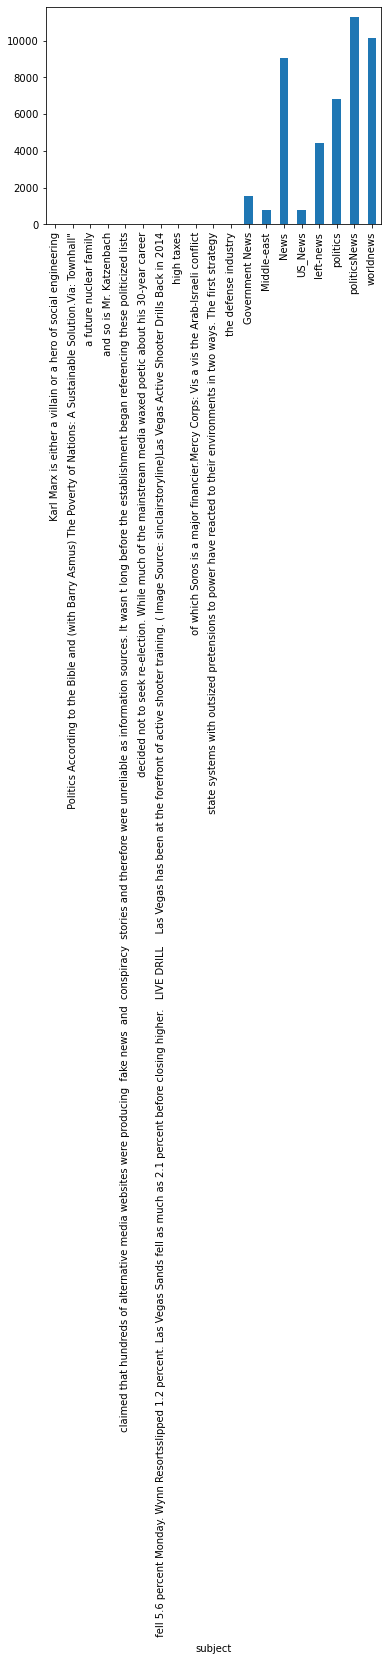

In [18]:
# How many articles per subject?
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [19]:
df.loc[:,'subject'].unique()

array(['worldnews', 'News', 'politics', 'Government News', 'politicsNews',
       'left-news', 'US_News', 'Middle-east',
       ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict',
       nan, ' and so is Mr. Katzenbach',
       ' state systems with outsized pretensions to power have reacted to their environments in two ways. The first strategy',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists',
       ' high taxes',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' the defense industry',
       ' Karl M

In [20]:
df = df[df['subject'].str.contains('and so is Mr. Katzenbach', ' a future nuclear family')== False]

In [21]:
df = df[df['subject'].str.contains('Karl Marx is either a villain or a hero of social engineering')== False]

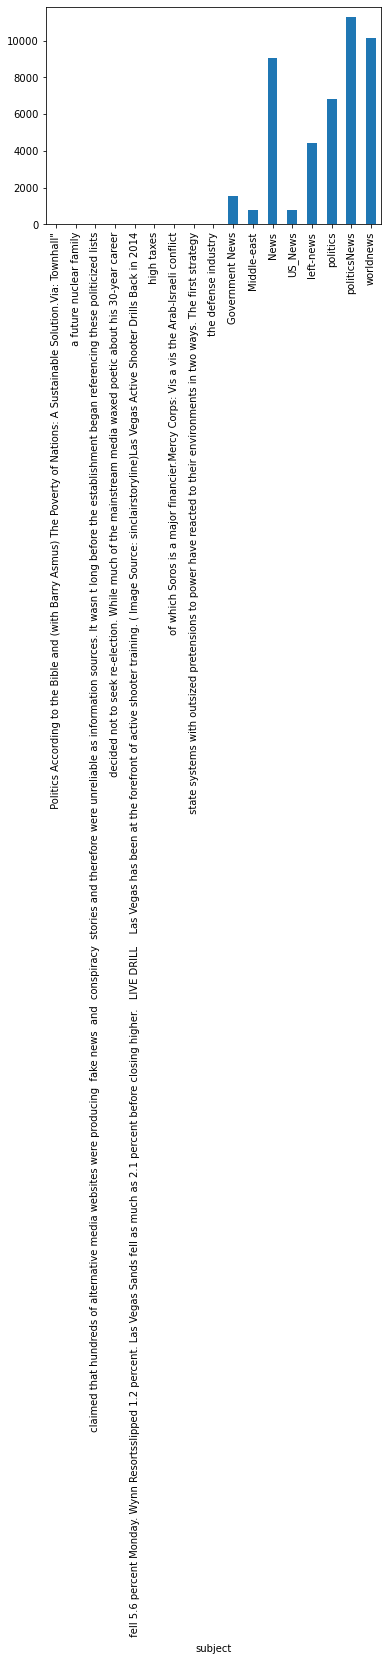

In [22]:
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
df = df[df['subject'].str.contains('of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict')== False]

In [24]:
df = df[df['subject'].str.contains('claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists')== False]

In [25]:
df = df[df['subject'].str.contains('state systems with outsized pretensions to power have reacted to their environments in two ways. The first strategy')== False]

In [26]:
df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7368\2980401333.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')== False]


In [27]:
df = df[df['subject'].str.contains('and so is Mr. Katzenbach', ' a future nuclear family')== False]

In [28]:
df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7368\901266348.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]


In [29]:
df = df[df['subject'].str.contains('high taxes')== False]

In [30]:
df = df[df['subject'].str.contains('decided not to seek re-election. While much of the mainstream media waxed poetic about his 30-year career')== False]

In [31]:
df = df[df['subject'].str.contains('the defense industry')== False]

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                               

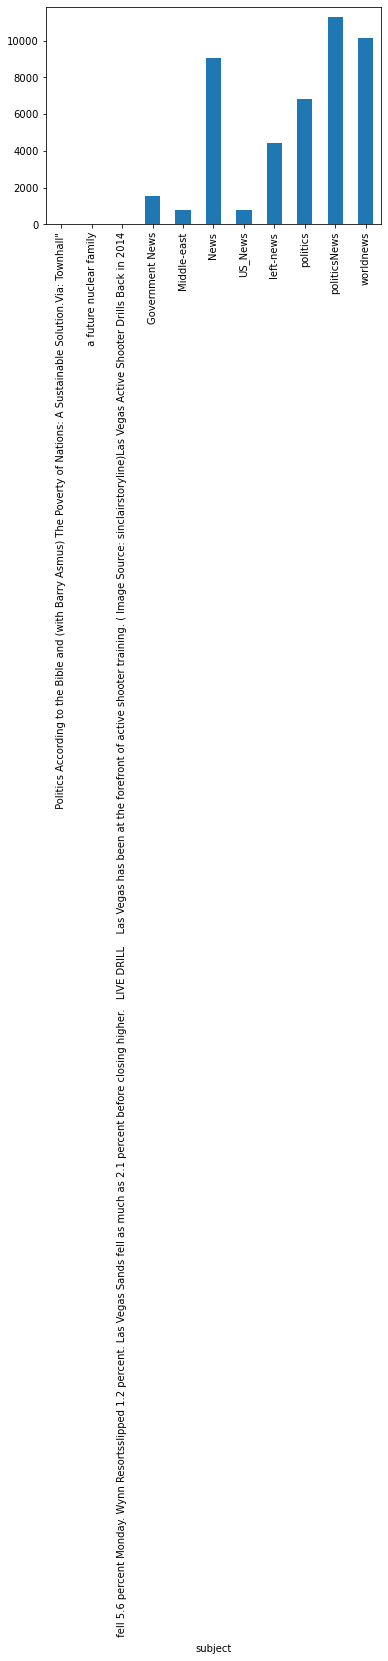

In [32]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [33]:
df = df[df['subject'].str.contains('a future nuclear family')== False]

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                                                                                                                                                                                                                  1570
Middle-east                                                                                                   

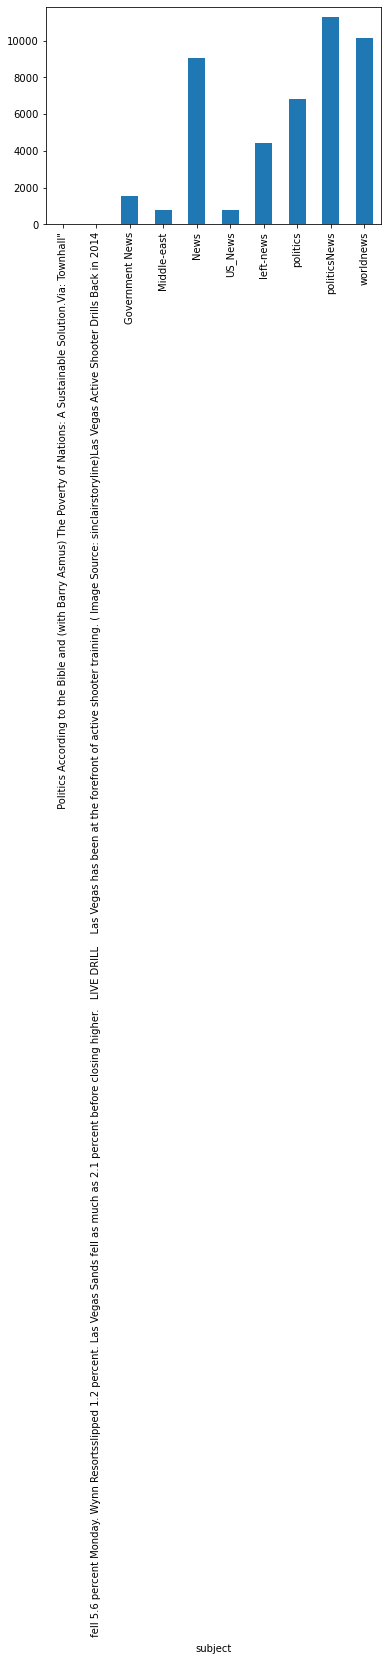

In [34]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [35]:
df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7368\901266348.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"')== False]


In [36]:
df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')==False]

C:\Users\admin\AppData\Local\Temp\ipykernel_7368\2790126174.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['subject'].str.contains('fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014')==False]


In [37]:
df = df.dropna(how = 'any', axis = 0)

subject
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014        2
Government News                                                                                                                                                                                                                                                                                  1570
Middle-east                                                                                                   

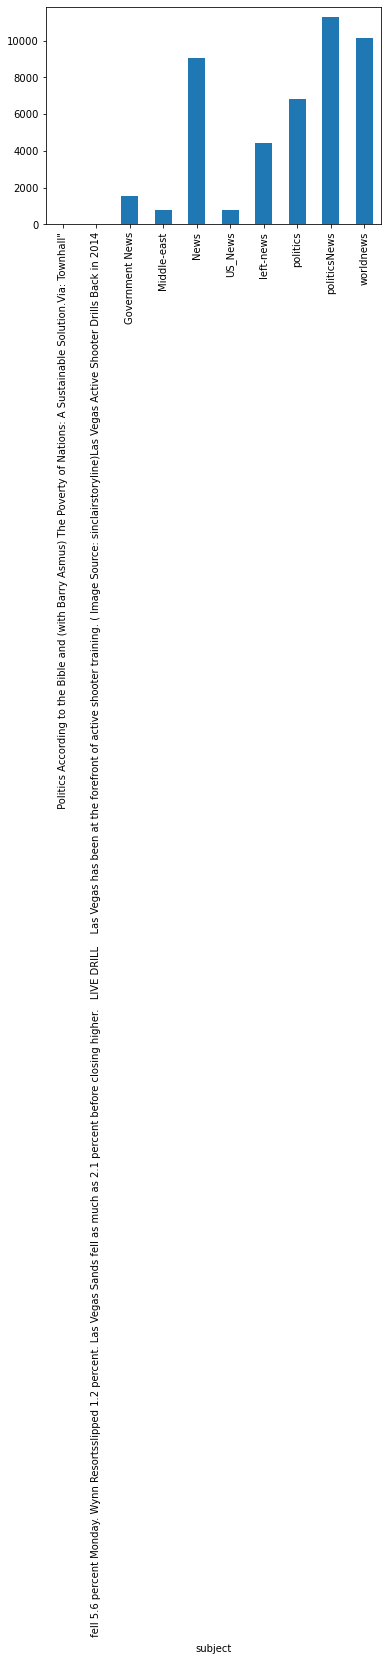

In [38]:
print(df.groupby(['subject'])['text'].count())
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [39]:
df.loc[:,'subject'].unique()

array(['worldnews', 'News', 'politics', 'Government News', 'politicsNews',
       'left-news', 'US_News', 'Middle-east',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"'],
      dtype=object)

target
fake    23502
true    21417
Name: text, dtype: int64


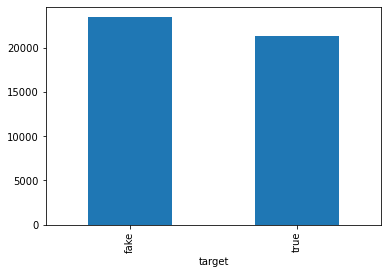

In [40]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

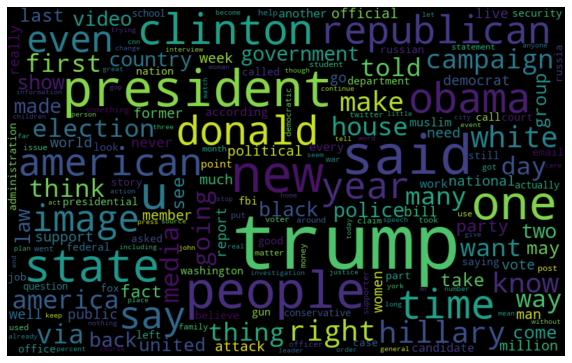

In [46]:
# Word cloud for fake news
!pip install wordcloud
from wordcloud import WordCloud

fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()


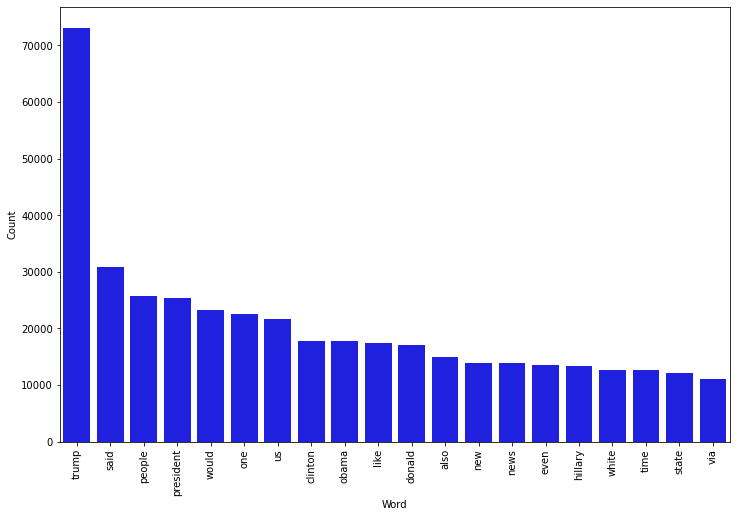

In [50]:
# Most frequent words in fake news
counter(df[df["target"] == "fake"], "text", 20)

# Modeling

In [53]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Preparing the Data

In [58]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [59]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.04%


Confusion matrix, without normalization


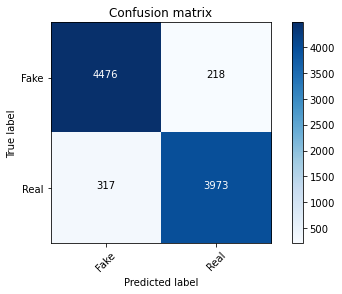

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic Regression

In [61]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.81%


Confusion matrix, without normalization


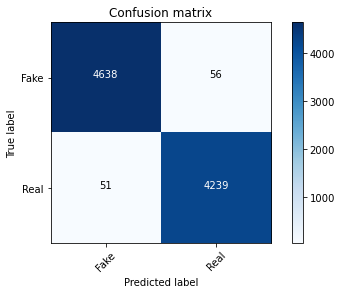

In [62]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.51%


Confusion matrix, without normalization


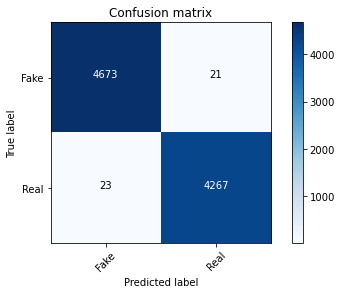

In [64]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.56%


Confusion matrix, without normalization


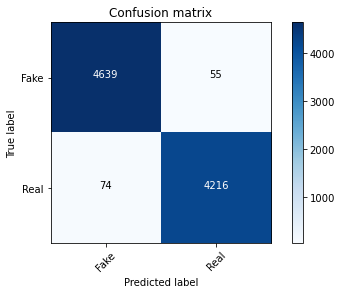

In [71]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [67]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.47%


Confusion matrix, without normalization


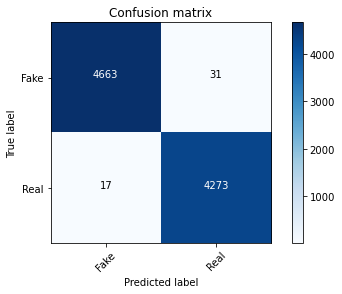

In [68]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Comparing Different Models

([<matplotlib.axis.YTick at 0x25719bc28e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

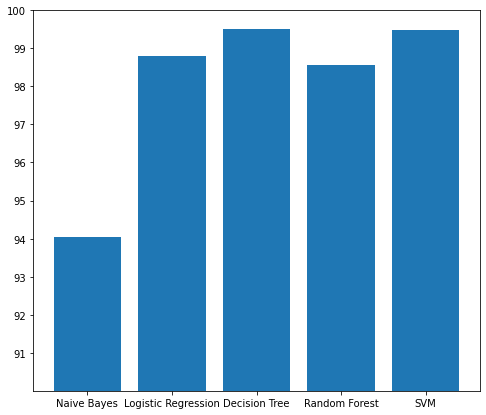

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

### The End.....